In [1]:
import numpy as np
import pandas as pd 
import os
import cv2
import skimage.transform
import skimage.io
import matplotlib.pyplot as plt
from random import seed
from random import random
from statistics import mean
from shutil import move

data_rose = '/content/drive/MyDrive/dataset/rose'
data_tulip = '/content/drive/MyDrive/dataset/tulip'
data_daisy = '/content/drive/MyDrive/dataset/daisy'

def inputPicture(folder):
    images = []
    labels = []
    x = 0
    if folder == data_rose:
        for i in range(100):
            y = 0
            labels.append(y)
    elif folder == data_tulip:
        for i in range(100):
            y = 1
            labels.append(y)
    elif folder == data_daisy:
        for i in range(100):
            y = 2
            labels.append(y)
    
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (320,240), interpolation = cv2.INTER_AREA) 
        if img is not None:
            images.append(img)
        x += 1
        if x == 100: break
    
    return images, labels

image_rose, label_rose = inputPicture(data_rose)
image_tulip, label_tulip = inputPicture(data_tulip)
image_daisy, label_daisy = inputPicture(data_daisy)

image = image_rose + image_tulip + image_daisy
target = label_rose + label_tulip + label_daisy

print(len(image))
print(len(target))

300
300


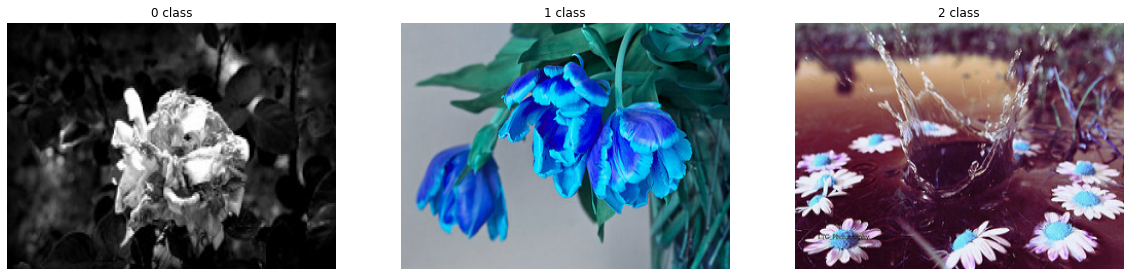

In [4]:
plt.figure(figsize = (20,20))
for i in range(3):
    img = image[100*i]
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(str(target[100*i]) + " class")

sigmoid function

In [73]:
def sigmoid(x):
    return 1.0 /(1.0+np.exp(-x))

Weight Initialization

In [74]:
from random import seed
from random import random
seed(1)
 
def initWeight(layer):
    nLayer = len(layer)
    bias = [np.random.randn(y,1) for y in layer[1:]]
    w = [np.random.randn(y,x) for x,y in zip(layer[:-1], layer[1:])]
    return [bias, w, nLayer]

Cost Fuction

In [75]:
def costFunction(a, y):
    return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

Feed Forward

In [76]:
def feedforward(x):
    weight = x
    weightNet = [x]
    dotProd = []
    for b, w in zip(Theta[0], Theta[1]):
        dots = np.dot(w, weight) + b
        dotProd.append(dots)
        weight = sigmoid(dots)
        weightNet.append(weight)
        
    return dotProd, weightNet

BackPropagation

In [77]:
def backpropagation(x,y):
    deltaBias = [np.zeros(b.shape) for b in Theta[0]]
    deltaW = [np.zeros(w.shape) for w in Theta[1]]
    
    dotProd, weight = feedforward(x)
    
    loss = costFunction(weight[-1], y)
    delta_cost = weight[-1] - y
    
    delta = delta_cost
    
    deltaBias[-1] = delta
    deltaW[-1]= np.dot(delta, weight[-2].T)
    
    for x in range(2, Theta[2]):
        dots = dotProd[-x]
        deltaA = delta_sigmoid(dots)
        delta = np.dot(Theta[1][-x + 1].T, delta) * deltaA
        deltaBias[-x] = delta
        deltaW[-x] = np.dot(delta, weight[-x - 1].T)
        
    return(loss, deltaBias, deltaW)

Prediction

In [103]:
def prediction(X):
    prediction = np.array([])
    labels = ["rose","tulip","daisy"]
    for x in X:
        dots, weight = feedforward(x)
        prediction = np.append(prediction, np.argmax(weight[-1]))
    prediction = np.array([labels[int(p)] for p in prediction])
    return prediction

Accuration

In [79]:
def accuration(X, y):
    tmp = 0
    for x, _y in zip(X, y):
        dots, weight = feedforward(x)
        
        if np.argmax(weight[-1]) == np.argmax(_y):
            tmp += 1
    ak = (float(tmp) / X.shape[0]) * 100
    return ak

Spliting data train and data test

In [80]:
from sklearn.model_selection import train_test_split as split
def train_test_split (X, Y, trainSize):
    X_train, X_test, Y_train, Y_test = split(X, Y, train_size = trainSize)
    return X_train, X_test, Y_train, Y_test

One Hot encoded

In [81]:
def one_hot_encode(target):
    classing = np.max(target) + 1
    encoded = np.eye(classing)[target]
    return encoded

In [82]:
def normalizePixel(data):
    return data/255

In [83]:
image = np.array(image)
image = normalizePixel(image)
image.shape

(300, 240, 320, 3)

In [84]:
mNeurons = image.shape[1] * image.shape[2] * image.shape[3]
mNeurons

230400

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(image, target, 0.8)

In [86]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 0.8)

In [87]:
X_train_CNN = X_train
X_test_CNN = X_test
X_val_CNN = X_val
Y_train_CNN = Y_train
Y_test_CNN = Y_test
Y_val_CNN = Y_val

In [88]:
def reshape_x(data,a):
    data = data.reshape(-1,a,1)
    return data

In [89]:
X_train = reshape_x(X_train, mNeurons)
X_test = reshape_x(X_test, mNeurons)
X_val = reshape_x(X_val, mNeurons)

In [90]:
Y_train = np.array(Y_train)
y_train_enc = one_hot_encode(Y_train)

In [91]:
y_train_enc = y_train_enc.reshape(-1, 3, 1)

In [92]:
alpha = 0.1
epoch = 50
Theta = initWeight([X_train[0].size, 128, y_train_enc[0].size])
len(Theta)

3

In [93]:
def getBatch(X, y, size):
    for idx in range(0, X.shape[0], size):
        batch = zip(X[idx:idx+size],
                   y[idx:idx+size])
        yield batch

In [94]:
def delta_sigmoid(x):
    return sigmoid(x) * (1- sigmoid(x))

In [95]:
batch_size = 32
nBatch = int(X_train.shape[0] / batch_size)

In [96]:
Y_val = np.array(Y_val)
y_val_enc = one_hot_encode(Y_val)
y_val_enc = y_val_enc.reshape(-1, 3, 1)

In [97]:
historyLoss = []
historyAcc = []
for j in range(epoch):
    batch_iter = getBatch(X_train, y_train_enc, batch_size)
    for i in range(nBatch):
        batch = next(batch_iter)
        deltaBias = [np.zeros(b.shape) for b in Theta[0]]
        deltaW = [np.zeros(w.shape) for w in Theta[1]]
        for batch_X, batch_Y in batch:
            loss, delta_deltaBias, delta_deltaW = backpropagation(batch_X, batch_Y)
            deltaBias = [db + ddb for db, ddb in zip(deltaBias, delta_deltaBias)]
            deltaW = [dw + ddw for dw, ddw in zip(deltaW, delta_deltaBias)]
    Theta[1] = [w - (alpha/batch_size)*delw for w, delw in zip(Theta[1], deltaW)]
    Theta[0] = [b - (alpha/batch_size)*delb for b, delb in zip(Theta[0], deltaBias)]
    historyLoss.append(loss)
    acc = accuration(X_val, y_val_enc)
    historyAcc.append(acc)
    print("\nEpoch : %d\tLoss: %f\tAkurasi: %f\n"%(j, loss, acc))


Epoch : 0	Loss: 12.444765	Akurasi: 35.416667


Epoch : 1	Loss: 11.647556	Akurasi: 35.416667


Epoch : 2	Loss: 3.939049	Akurasi: 31.250000


Epoch : 3	Loss: 1.837129	Akurasi: 29.166667


Epoch : 4	Loss: 5.759851	Akurasi: 29.166667


Epoch : 5	Loss: 6.182092	Akurasi: 31.250000


Epoch : 6	Loss: 1.381757	Akurasi: 37.500000


Epoch : 7	Loss: 5.607022	Akurasi: 39.583333


Epoch : 8	Loss: 4.593704	Akurasi: 33.333333


Epoch : 9	Loss: 1.475434	Akurasi: 35.416667


Epoch : 10	Loss: 2.682589	Akurasi: 37.500000


Epoch : 11	Loss: 1.673943	Akurasi: 37.500000


Epoch : 12	Loss: 2.426320	Akurasi: 41.666667


Epoch : 13	Loss: 1.824803	Akurasi: 35.416667


Epoch : 14	Loss: 2.271753	Akurasi: 52.083333


Epoch : 15	Loss: 1.886764	Akurasi: 35.416667


Epoch : 16	Loss: 2.190178	Akurasi: 47.916667


Epoch : 17	Loss: 1.867556	Akurasi: 35.416667


Epoch : 18	Loss: 2.185533	Akurasi: 47.916667


Epoch : 19	Loss: 1.755536	Akurasi: 35.416667


Epoch : 20	Loss: 2.399981	Akurasi: 37.500000


Epoch : 21	Loss: 1.4

In [98]:
Y_test_arr = np.array(Y_test)
y_test_enc = one_hot_encode(Y_test_arr)
y_test_enc = y_test_enc.reshape(-1, 3, 1)

In [99]:
accuration(X_test, y_test_enc)

40.0

In [104]:
print(prediction(X_test))

['tulip' 'tulip' 'daisy' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'daisy'
 'tulip' 'daisy' 'tulip' 'daisy' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip'
 'tulip' 'daisy' 'daisy' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'daisy'
 'daisy' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip'
 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip'
 'daisy' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip' 'tulip'
 'tulip' 'tulip' 'daisy' 'tulip' 'tulip' 'tulip']


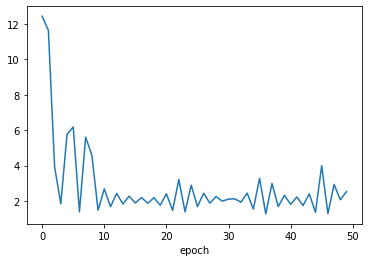

In [105]:
plt.plot(range(len(historyLoss)),historyLoss)
plt.xlabel('epoch')
plt.show()

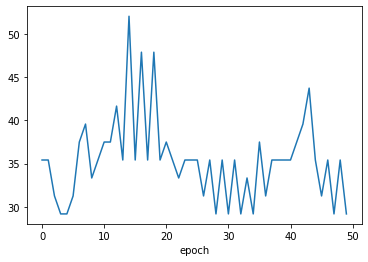

In [106]:
plt.plot(range(len(historyAcc)),historyAcc)
plt.xlabel('epoch')
plt.show()